In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay,classification_report
import warnings
warnings.filterwarnings("ignore")

In [55]:
df = pd.read_excel("Data_Science_Internship.xlsx")

In [3]:
df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaT,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [4]:
df.shape

(46608, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      46608 non-null  int64         
 1   Agent_id        46608 non-null  object        
 2   status          46608 non-null  object        
 3   lost_reason     43244 non-null  object        
 4   budget          42908 non-null  object        
 5   lease           44267 non-null  object        
 6   movein          32970 non-null  datetime64[ns]
 7   source          46608 non-null  object        
 8   source_city     46608 non-null  object        
 9   source_country  46608 non-null  object        
 10  utm_source      46608 non-null  object        
 11  utm_medium      46608 non-null  object        
 12  des_city        46608 non-null  object        
 13  des_country     46608 non-null  object        
 14  room_type       23061 non-null  object        
 15  le

In [7]:
#dropping columns 
df = df.drop(["Unnamed: 0","movein"], axis = 1)

In [8]:
df.isnull().sum()

Agent_id              0
status                0
lost_reason        3364
budget             3700
lease              2341
source                0
source_city           0
source_country        0
utm_source            0
utm_medium            0
des_city              0
des_country           0
room_type         23547
lead_id               0
dtype: int64

In [ ]:
#as per given things 
#This '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' represents NaN and could be present in more than 
#one column so lets check that

In [10]:
df1 =df.replace("9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0", np.NAN)

In [11]:
df1.head()

,Agent_id,status,lost_reason,budget,lease,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [12]:
#dropping the duplicates
df1.drop_duplicates()

,Agent_id,status,lost_reason,budget,lease,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,NaN,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4a9092e4c0eabf958ed9aea59c50d8ea3f08f691...
46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,NaN,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...
46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,d9e0f455b68a6573544ffac32292541a510fe2daffe2bb...
46606,8b8b029f1142f5cbc825aa6cbee01406c915c6b055db79...,LOST,Low availability,1108,294,d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e2...,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,b936ee09e20b3b2234907cde349cda1c1a5327c4a486bf...,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,abb8e2badd5b6265c3237170cc599257a

In [13]:
#columns which has more than 50% missing values are dropped
missing_percentage = df1.isnull().sum() / len(df)
columns_to_drop = missing_percentage[missing_percentage > 0.5].index.tolist()
df2 = df1.drop(columns=columns_to_drop)

In [14]:
#room type removed having 50% of missing values
df2.shape

(46608, 13)

In [15]:
df2.isnull().sum() #null values are present

Agent_id             0
status               0
lost_reason       3364
budget            3700
lease             2341
source            5977
source_city       8851
source_country    8641
utm_source          61
utm_medium        3187
des_city          2537
des_country       2537
lead_id              0
dtype: int64

In [16]:
#lets percentage of calculate the missing values
df2.isnull().mean()*100

Agent_id           0.000000
status             0.000000
lost_reason        7.217645
budget             7.938551
lease              5.022743
source            12.823979
source_city       18.990302
source_country    18.539736
utm_source         0.130879
utm_medium         6.837882
des_city           5.443272
des_country        5.443272
lead_id            0.000000
dtype: float64

In [17]:
#As all are  categorical data so we can use mode imputation for missing values

In [18]:
cols = ["lost_reason", "budget", "lease", "source", "source_city", "source_country", "utm_source", "utm_medium", 
        "des_city", "des_country"]
for i in cols:
    df2 = df2.fillna(df2[i].mode()[0])
    

In [19]:
df2.isnull().sum()# after mode imputation

Agent_id          0
status            0
lost_reason       0
budget            0
lease             0
source            0
source_city       0
source_country    0
utm_source        0
utm_medium        0
des_city          0
des_country       0
lead_id           0
dtype: int64

In [20]:
df2.shape

(46608, 13)

In [21]:
df2.head(2)

,Agent_id,status,lost_reason,budget,lease,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,Low availability,Low availability,Low availability,Low availability,Low availability,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,Low availability,Low availability,Low availability,Low availability,Low availability,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...


In [22]:
#checking count of data in columns

In [23]:
#dropping other than won and lost in status
df2 = df2[df2['status'].isin(['WON', 'LOST'])]

In [24]:
df2.shape

(46317, 13)

In [25]:
df2["status"].value_counts()

LOST    43244
WON      3073
Name: status, dtype: int64

In [26]:
#percentage of lost and won data
df2["status"].value_counts()/len(df2)*100  #from this we say that highly imbalance the data

LOST    93.365287
WON      6.634713
Name: status, dtype: float64

<AxesSubplot:xlabel='status', ylabel='count'>

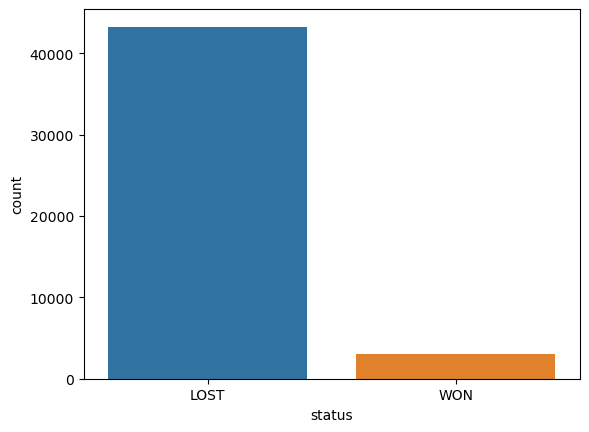

In [27]:
sns.countplot(df2["status"]) #highly imbalanced data

Low availability                  11965
Not responding                     7827
Not interested                     6449
Low budget                         5505
Wants private accommodation        2781
Short stay                         2264
Not a student                      1518
Just Enquiring                     1263
Inadequate details                  827
Semester stay                       817
Booked with manager                 676
Junk lead                           629
Booked on campus accommodation      613
Supply issue                        538
No supply                           534
Not serving in that region          411
Repeat lead                         394
Booked with competitor              356
Not going to university             329
Distance issue                      219
Junk lead/ Just Enquiring           147
Lead issue                          127
Looking for admission                41
Didn't respond in time               35
Visa/admission denied                17


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Not responding'),
  Text(1, 0, 'Low budget'),
  Text(2, 0, 'Junk lead'),
  Text(3, 0, 'Wants private accommodation'),
  Text(4, 0, 'Short stay'),
  Text(5, 0, 'Booked with manager'),
  Text(6, 0, 'Low availability'),
  Text(7, 0, 'Not interested'),
  Text(8, 0, 'Just Enquiring'),
  Text(9, 0, 'Distance issue'),
  Text(10, 0, 'Not serving in that region'),
  Text(11, 0, 'No supply'),
  Text(12, 0, 'Repeat lead'),
  Text(13, 0, 'Not a student'),
  Text(14, 0, 'Semester stay'),
  Text(15, 0, 'Supply issue'),
  Text(16, 0, 'Visa/admission denied'),
  Text(17, 0, 'Inadequate details'),
  Text(18, 0, 'Booked with competitor'),
  Text(19, 0, 'Not going to university'),
  Text(20, 0, 'Junk lead/ Just Enquiring'),
  Text(21, 0, 'Lead issue'),
  Text(22, 0, 'Booked on campus accommodation'),
  Text(23, 0, 'Looking for admission'),
  Text(24, 0, '

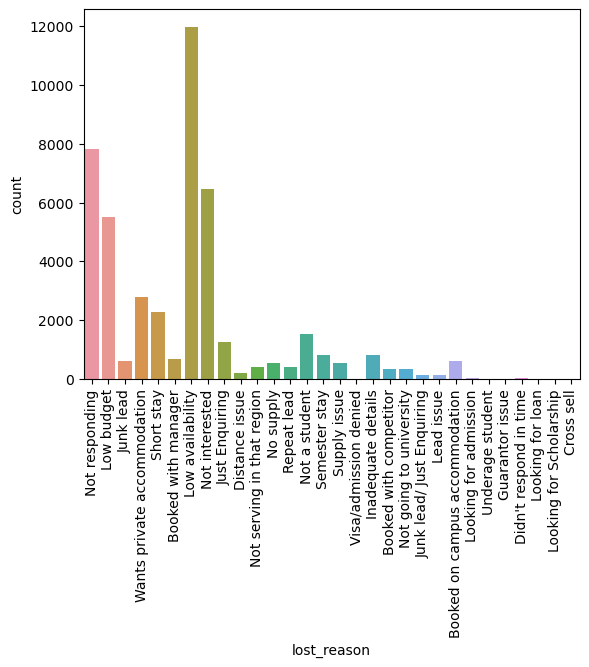

In [28]:
print(df2["lost_reason"].value_counts())
sns.countplot(df2["lost_reason"])
plt.xticks(rotation=90)

In [29]:
print(df2["budget"].value_counts())

£60 - £120 Per week     9750
£121 - £180 Per Week    8878
0-0                     5719
Low availability        3694
£181 - £240 Per Week    2143
                        ... 
250 Per Week               1
0-80-100$                  1
0-235                      1
£120-160 Per Week          1
0-500 PCM                  1
Name: budget, Length: 1835, dtype: int64


In [30]:
len(df2["budget"].unique())

1835

In [31]:
print(df2["lease"].value_counts())

Full Year Course Stay 40 - 44 weeks           11000
0                                              7538
Complete Education Year Stay 50 - 52 weeks     6451
51                                             3952
Semester Stay 20 - 24 weeks                    2753
                                              ...  
36-40 weeks                                       1
12 month                                          1
44 weeks/51 weeks                                 1
full year stayt                                   1
78                                                1
Name: lease, Length: 312, dtype: int64


In [44]:
#number of unique values
len(df2["lease"].unique())

312

In [32]:
#creating label encoding
le = LabelEncoder()

In [33]:
#taking all object columns and labelencoding on same
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = le.fit_transform(df2[col].astype(str))


In [34]:
print(df2.head(2))

   Agent_id  status  lost_reason  budget  lease  source  source_city  \
0        12       0           21    1702    276     444         2718   
1        20       0           16    1702    276     444         2718   

   source_country  utm_source  utm_medium  des_city  des_country  lead_id  
0             113           5          10       206            8    24421  
1             113           5          10        74            8    22037  


<AxesSubplot:>

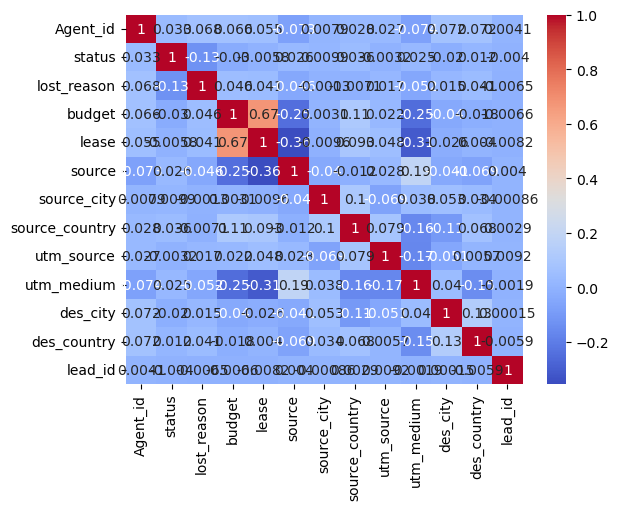

In [35]:
sns.heatmap(df2.corr(), cmap='coolwarm', annot=True) #budget and lease intermidate correaltion (i.e. 0.67)

In [36]:
#Its highly imbalanced data so lets use SMOTE technique to balance the data

In [37]:
df2 = df2.drop(["Agent_id","lead_id"], axis=1) #irrevalent columns

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46317 entries, 0 to 46607
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   status          46317 non-null  int32
 1   lost_reason     46317 non-null  int32
 2   budget          46317 non-null  int32
 3   lease           46317 non-null  int32
 4   source          46317 non-null  int32
 5   source_city     46317 non-null  int32
 6   source_country  46317 non-null  int32
 7   utm_source      46317 non-null  int32
 8   utm_medium      46317 non-null  int32
 9   des_city        46317 non-null  int32
 10  des_country     46317 non-null  int32
dtypes: int32(11)
memory usage: 3.3 MB


In [38]:
X =df2.drop("status", axis = 1)
y = df2["status"]

In [39]:
smt = SMOTETomek(sampling_strategy = "not majority", random_state=100)
X1, y1 = smt.fit_resample(X, y)

In [40]:
X1.shape , y1.shape

((85498, 10), (85498,))

In [41]:
#normalization formula 
def norm_func(i):                        
    x = (i-i.min())/(i.max()-i.min())    
    return(x)    
df3 = norm_func(X1)

In [46]:
final = pd.concat([df3,y1], axis = 1)

In [47]:
final

,lost_reason,budget,lease,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,status
0,0.724138,0.928026,0.887460,0.651026,0.629896,0.614130,0.147059,0.158730,0.940639,0.571429,0
1,0.551724,0.928026,0.887460,0.651026,0.629896,0.614130,0.147059,0.158730,0.337900,0.571429,0
2,0.724138,0.954198,0.855305,0.502933,0.606952,0.902174,0.764706,0.047619,0.082192,0.571429,0
3,0.551724,0.005453,0.006431,0.744868,0.653071,0.902174,0.764706,0.047619,0.118721,0.571429,0
4,0.275862,0.928026,0.887460,0.651026,0.629896,0.614130,0.147059,0.158730,0.643836,0.714286,0
...,...,...,...,...,...,...,...,...,...,...,...
85493,0.517241,0.673937,0.196141,0.645161,0.630127,0.586957,0.235294,0.222222,0.063927,0.571429,1
85494,0.517241,0.983097,0.855305,0.502933,0.185863,0.168478,0.676471,0.333333,0.246575,0.571429,1
85495,0.517241,0.095965,0.633441,0.637830,0.629896,0.614130,0.264706,0.746032,0.420091,0.571429,1
85496,0.517241,0.418757,0.581994,0.781525,0.509849,0.668478,0.764706,0.047619,0.799087,0.571429,1


In [48]:
final["status"].value_counts()

0    42749
1    42749
Name: status, dtype: int64

In [49]:
X2 = final.drop(["status"], axis = 1)
y2 = final['status']

In [50]:
X2.shape , y2.shape

((85498, 10), (85498,))

In [51]:
#Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2)

# Logistic Regression model

In [57]:
# Fitting on  Logistic Regression model
param = LogisticRegression(penalty='l2', C=3.0, solver='lbfgs', max_iter=1000)
param.fit(X_train, y_train)
# predictions on test data
y_pred_param = param.predict(X_test)
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_param))
print("Precision:", precision_score(y_test, y_pred_param))
print("Recall:", recall_score(y_test, y_pred_param))
print("F1_score:", precision_score(y_test, y_pred_param))

Accuracy: 0.7667251461988304
Precision: 0.7202803917802958
Recall: 0.8745482103299522
F1_score: 0.7202803917802958
AUC-ROC: 0.7663835736619842


# KNN

In [58]:
#Fitting on KNN
param1 = KNeighborsClassifier(n_neighbors=2, weights='uniform', algorithm='auto', metric='minkowski')
param1.fit(X_train, y_train)
#predictions on test data
y_pred_param1 = param1.predict(X_test)
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_param1))
print("Precision:", precision_score(y_test, y_pred_param1))
print("Recall:", recall_score(y_test, y_pred_param1))
print("F1_score:", precision_score(y_test, y_pred_param1))

Accuracy: 0.9582456140350877
Precision: 0.9544561322390475
Recall: 0.962690917570246
F1_score: 0.9544561322390475


# Decision Tree

In [59]:
#Fitting on decision tree
param2 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=50, min_samples_split=5, min_samples_leaf=1)
param2.fit(X_train, y_train)
#predictions on test data
y_pred_param2 = param2.predict(X_test)
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_param2))
print("Precision:", precision_score(y_test, y_pred_param2))
print("Recall:", recall_score(y_test, y_pred_param2))
print("F1_score:", precision_score(y_test, y_pred_param2))

Accuracy: 0.9729824561403508
Precision: 0.9745059057420185
Recall: 0.9715518246473126
F1_score: 0.9745059057420185


# Random Forest  Model

In [61]:
#Fitting on random forest tree
param3 = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, max_features='auto',
                                bootstrap=True, oob_score=False)
param3.fit(X_train, y_train)
#predictions on test data
y_pred_param3 = param3.predict(X_test)
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_param3))
print("Precision:", precision_score(y_test, y_pred_param3))
print("Recall:", recall_score(y_test, y_pred_param3))
print("F1_score:", precision_score(y_test, y_pred_param3))

Accuracy: 0.9847368421052631
Precision: 0.9811386253182134
Recall: 0.9885740935058879
F1_score: 0.9811386253182134


# Best fit model Random forest Model

In [62]:
# predicting the train label 
y_pred_train = param3.predict(X_train)

In [63]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34226
           1       1.00      1.00      1.00     34172

    accuracy                           1.00     68398
   macro avg       1.00      1.00      1.00     68398
weighted avg       1.00      1.00      1.00     68398



In [64]:
print(f1_score(y_train,y_pred_train,average='weighted'))

0.9991081611345476


In [65]:
train_fpr,train_tpr,train_threshold = roc_curve(y_train,y_pred_train)
print(train_fpr)
print(train_tpr)
print(train_threshold)

[0.         0.00102261 1.        ]
[0.         0.99923914 1.        ]
[2 1 0]


In [67]:
#Now predicting on test data

In [68]:
y_pred_test = param3.predict(X_test)

In [69]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8523
           1       0.98      0.99      0.98      8577

    accuracy                           0.98     17100
   macro avg       0.98      0.98      0.98     17100
weighted avg       0.98      0.98      0.98     17100



In [70]:
print(f1_score(y_test,y_pred_test,average='weighted'))

0.9847364383357475


In [71]:
train_fpr2,train_tpr2,train_threshold2 = roc_curve(y_test,y_pred_test)
print(train_fpr2)
print(train_tpr2)
print(train_threshold2)

[0.         0.01912472 1.        ]
[0.         0.98857409 1.        ]
[2 1 0]


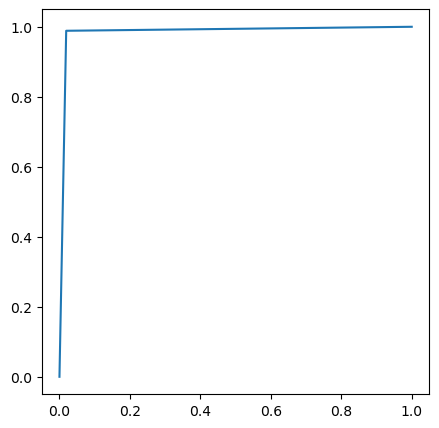

In [72]:
plt.figure(figsize=(5,5))
plt.plot(train_fpr2,train_tpr2)